In [63]:
%pip install numpy pandas matplotlib seaborn scipy statsmodels scikit-learn plotly shapely pygal squarify

Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


plt.rcParams['figure.figsize'] = [20, 15]
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
font = {'family': 'calibri',
        'weight': 'bold',
        'size': 20}
plt.rc('font', **font)
plt.rcParams['text.color'] = 'Orange'
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [65]:
df = pd.read_csv((r'E:\Python finance projects\Projects for Github\all-data.csv'), engine='python', encoding='ISO-8859-1')
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [66]:
col1=df.keys()[0]
col2=df.keys()[1]
col2

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [67]:
df2 = pd.DataFrame([[col1, col2]], columns=list([col1, col2]), index=[4845])
df2

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
4845,neutral,"According to Gran , the company has no plans t..."


In [68]:
df = pd.concat([df.iloc[:4845], df2, df.iloc[4845:]]).reset_index(drop=True)

In [69]:
df = df.rename(columns={col1: 'sentiment', col2: 'news'})

In [70]:
df

,sentiment,news
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


<Axes: xlabel='count', ylabel='sentiment'>

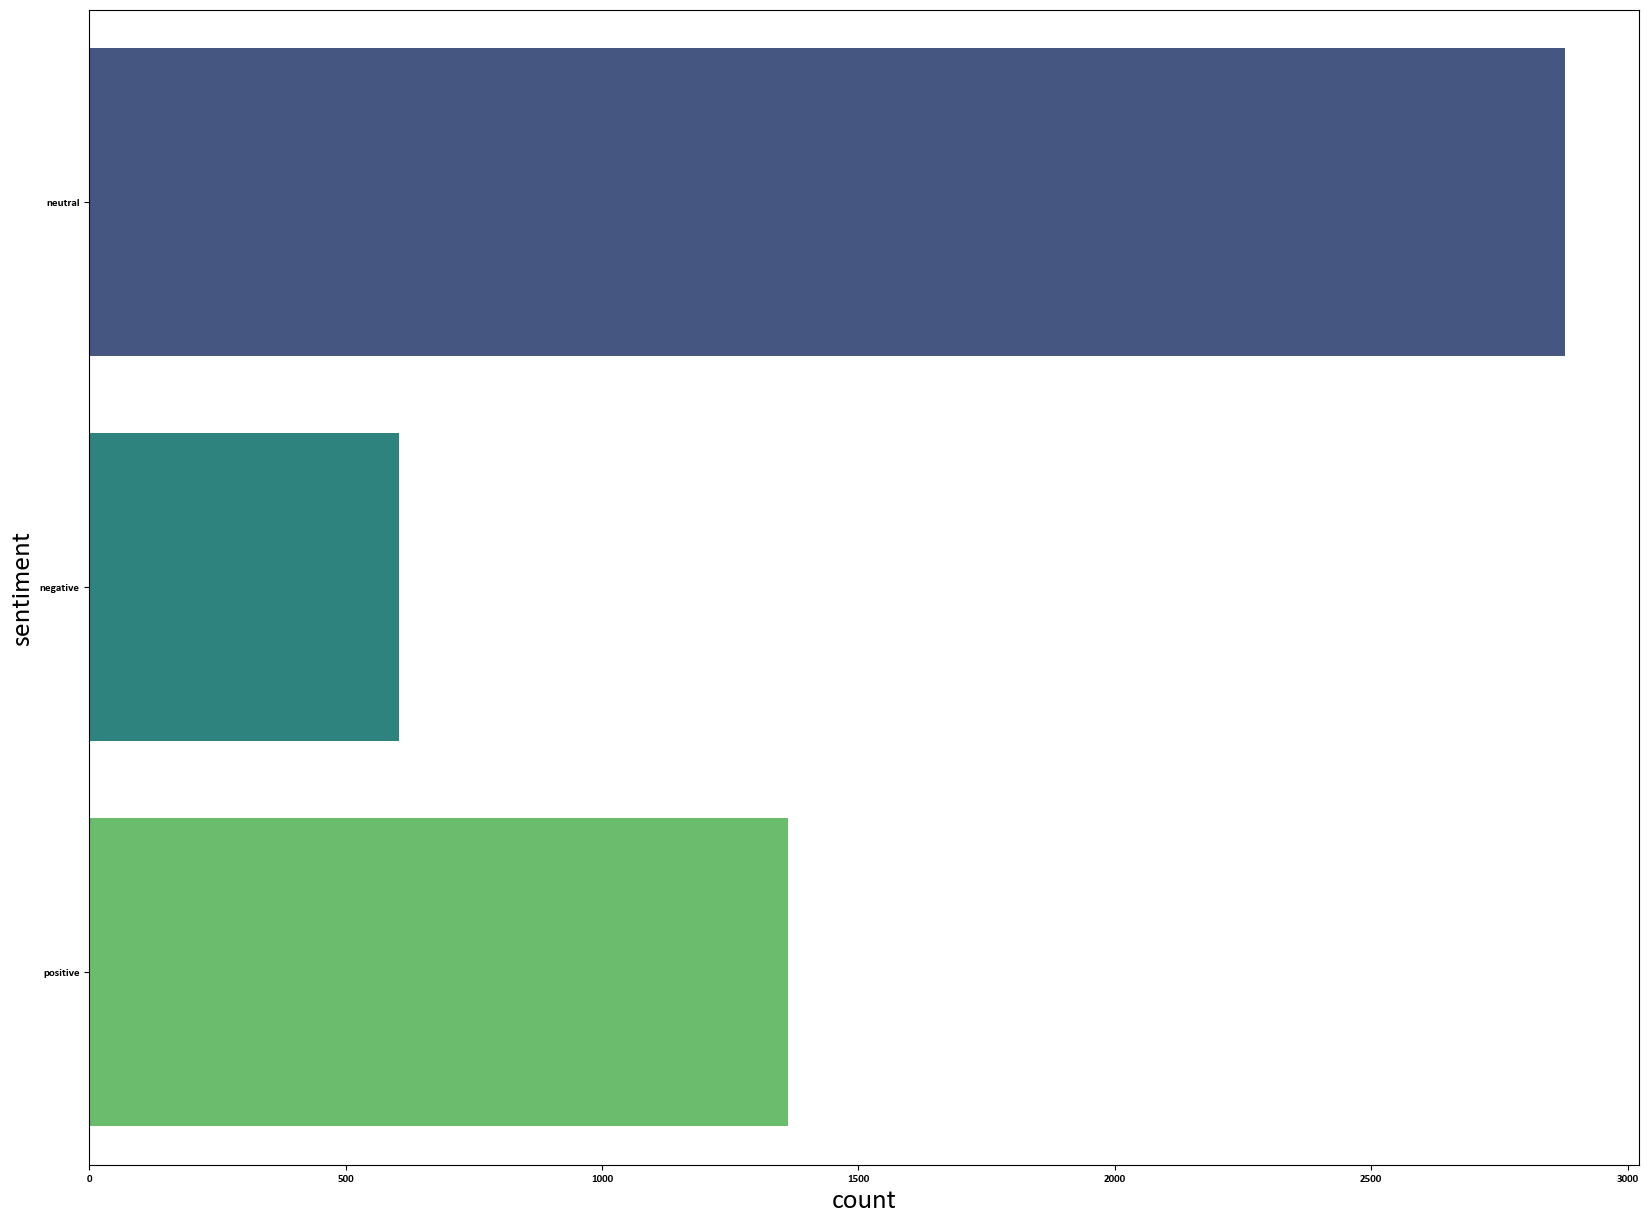

In [71]:
sns.countplot(y="sentiment", palette='viridis', data=df)

In [72]:
df.isnull().sum()

sentiment    0
news         0
dtype: int64

In [73]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [74]:
from textblob import TextBlob

In [75]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df['Review Text'] = preprocess(df['news'])

In [76]:
df['polarity'] = df['news'].map(lambda text: TextBlob(text).sentiment.polarity)
df['news_len'] = df['news'].astype(str).apply(len)
df['word_count'] = df['news'].apply(lambda x: len(str(x).split()))

In [77]:
df

,sentiment,news,Review Text,polarity,news_len,word_count
0,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,0.083333,190,31
1,negative,The international electronic industry company ...,The international electronic industry company ...,0.000000,228,36
2,positive,With the new production plant the company woul...,With the new production plant the company woul...,-0.064802,206,33
3,positive,According to the company 's updated strategy f...,According to the company 's updated strategy f...,0.000000,203,41
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,0.500000,178,25
...,...,...,...,...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0.000000,148,30
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...,Operating profit fell to EUR 35.4 mn from EUR ...,0.000000,108,23
4843,negative,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,0.040000,226,44
4844,negative,Sales in Finland decreased by 10.5 % in Januar...,Sales in Finland decreased by 10.5 % in Januar...,-0.200000,95,19


In [78]:
print('top 4 random reviews with the highest positive sentiment polarity: \n')

df1=df.drop_duplicates(subset=['Review Text'])

cl = df1.loc[df1.polarity == 1, ['Review Text']].sample(4).values
for c in cl:
    print(c[0])

top 4 random reviews with the highest positive sentiment polarity: 

`` In terms of profitability and earnings 2007 was the best year in our history , '' Chief Executive Veli-Matti Mattila said .
Welcome !
While I cant understand what theyre saying , its impressive to watch him hit that ball at those speeds .
You are warmly welcome !


In [79]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl1 = df.loc[df.polarity == 0, ['Review Text']].sample(5).values
for c in cl1:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

The contracts of the employees , 96 of whom are blue-collar workers , will be ended between March and August 2011 .
All reproduction for further distribution is prohibited .
The development of the technological park , which will specialize in telecommunications and information technologies , is part of the state program for the formation of technoparks for hi-tech sectors in Russia .
This solution is an extension to the existing online mediation solution delivered earlier by Comptel and IBM .
Finnish publisher Alma Media ( HEL : ALN1V ) said Wednesday it has decided to further extend its EUR1 .85 ( USD2 .75 ) apiece mandatory tender offer for media group Talentum ( HEL : TTM1V ) , which started on 19 August , until 16 November .


In [80]:
print('5 reviews with the most negative polarity having polarity lesser than -0.80: \n')
cl3 = df.loc[df.polarity <= -0.80, ['Review Text']].sample(5).values
for c in cl3:
    print(c[0])

5 reviews with the most negative polarity having polarity lesser than -0.80: 

There has been some recovery of the base metals prices and increased demand for metals in China , however .
Besides , as there is no depositor preference in Finland , senior debt and deposits rank on a par , which is also taken into consideration , the agency added .
Mr Jortikka is president of the base metal division of Outotec Oyj in Finland and is on the executive committee of Outotec .
Capital base and capital adequacy measurement is based on approaches under Basel II .
Airvana 's UMTS Home Base Station femto cell uses software-based functionality and off-the-shelf silicon to accelerate feature development and reduce product cost .


<Axes: xlabel='polarity'>

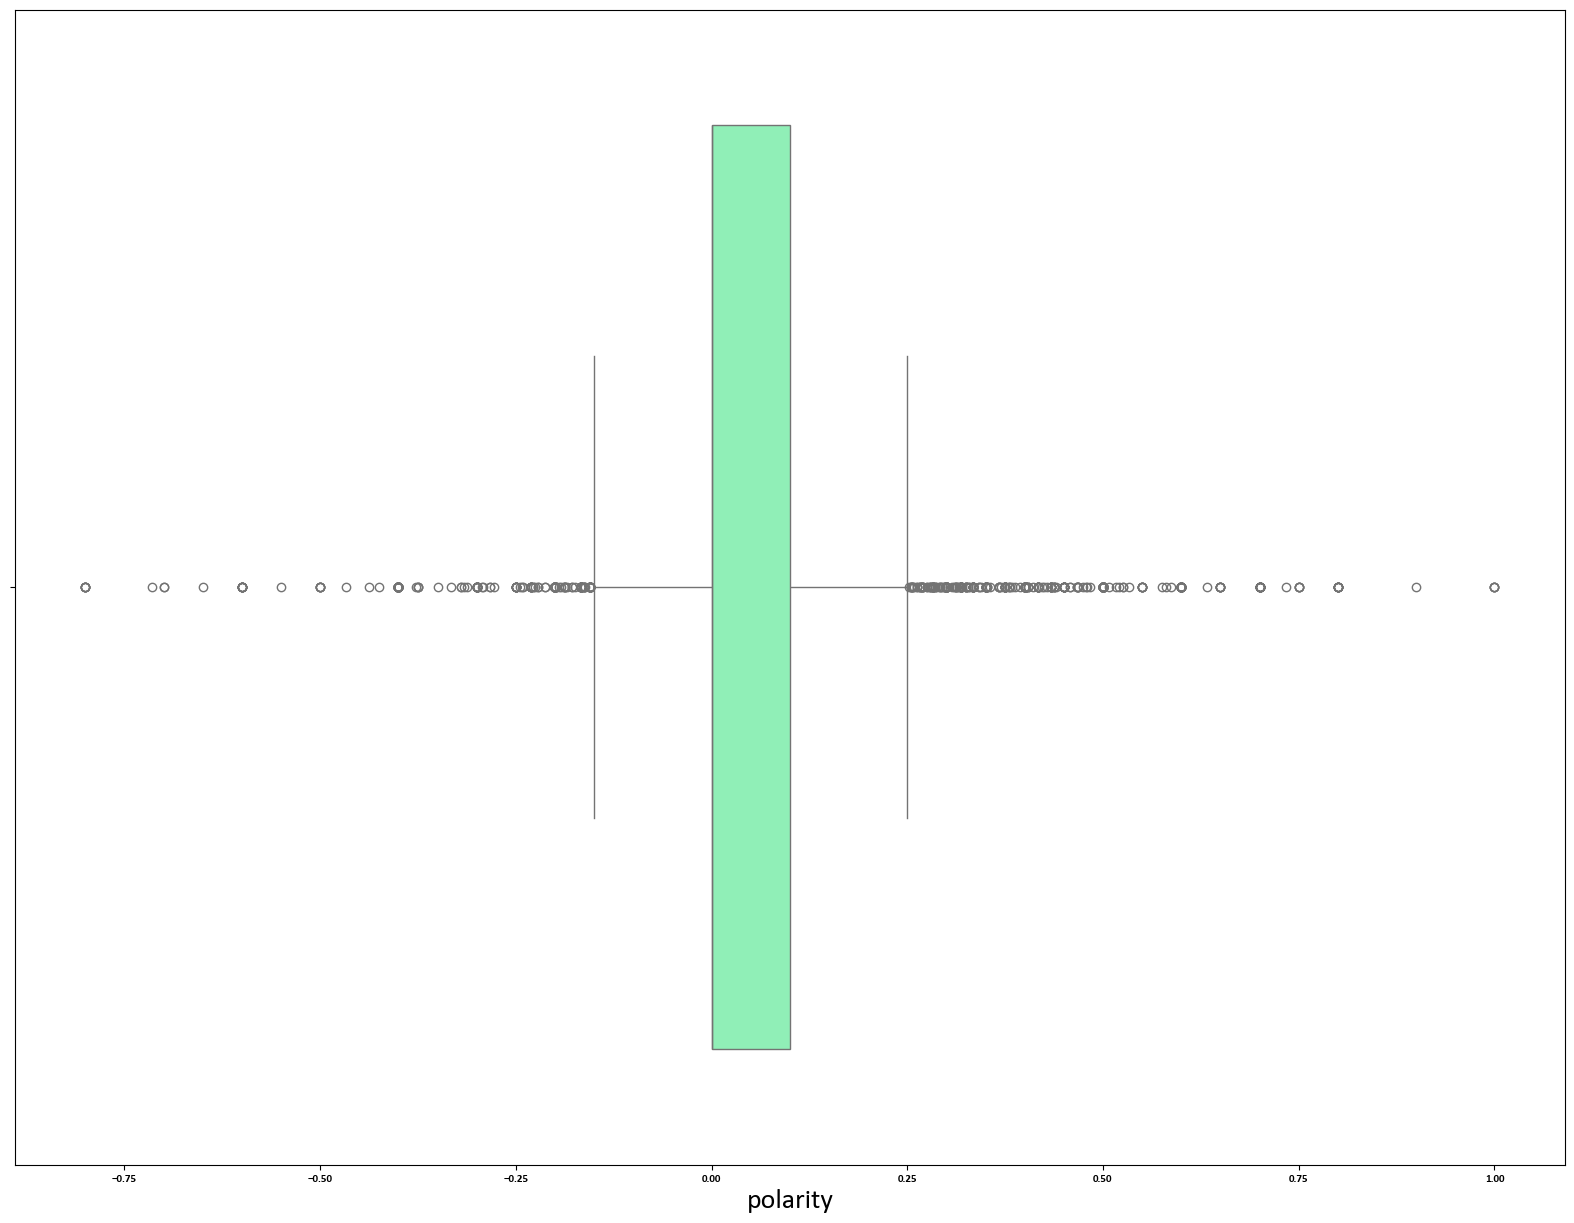

In [81]:
sns.boxplot(x="polarity", palette="rainbow", data=df)

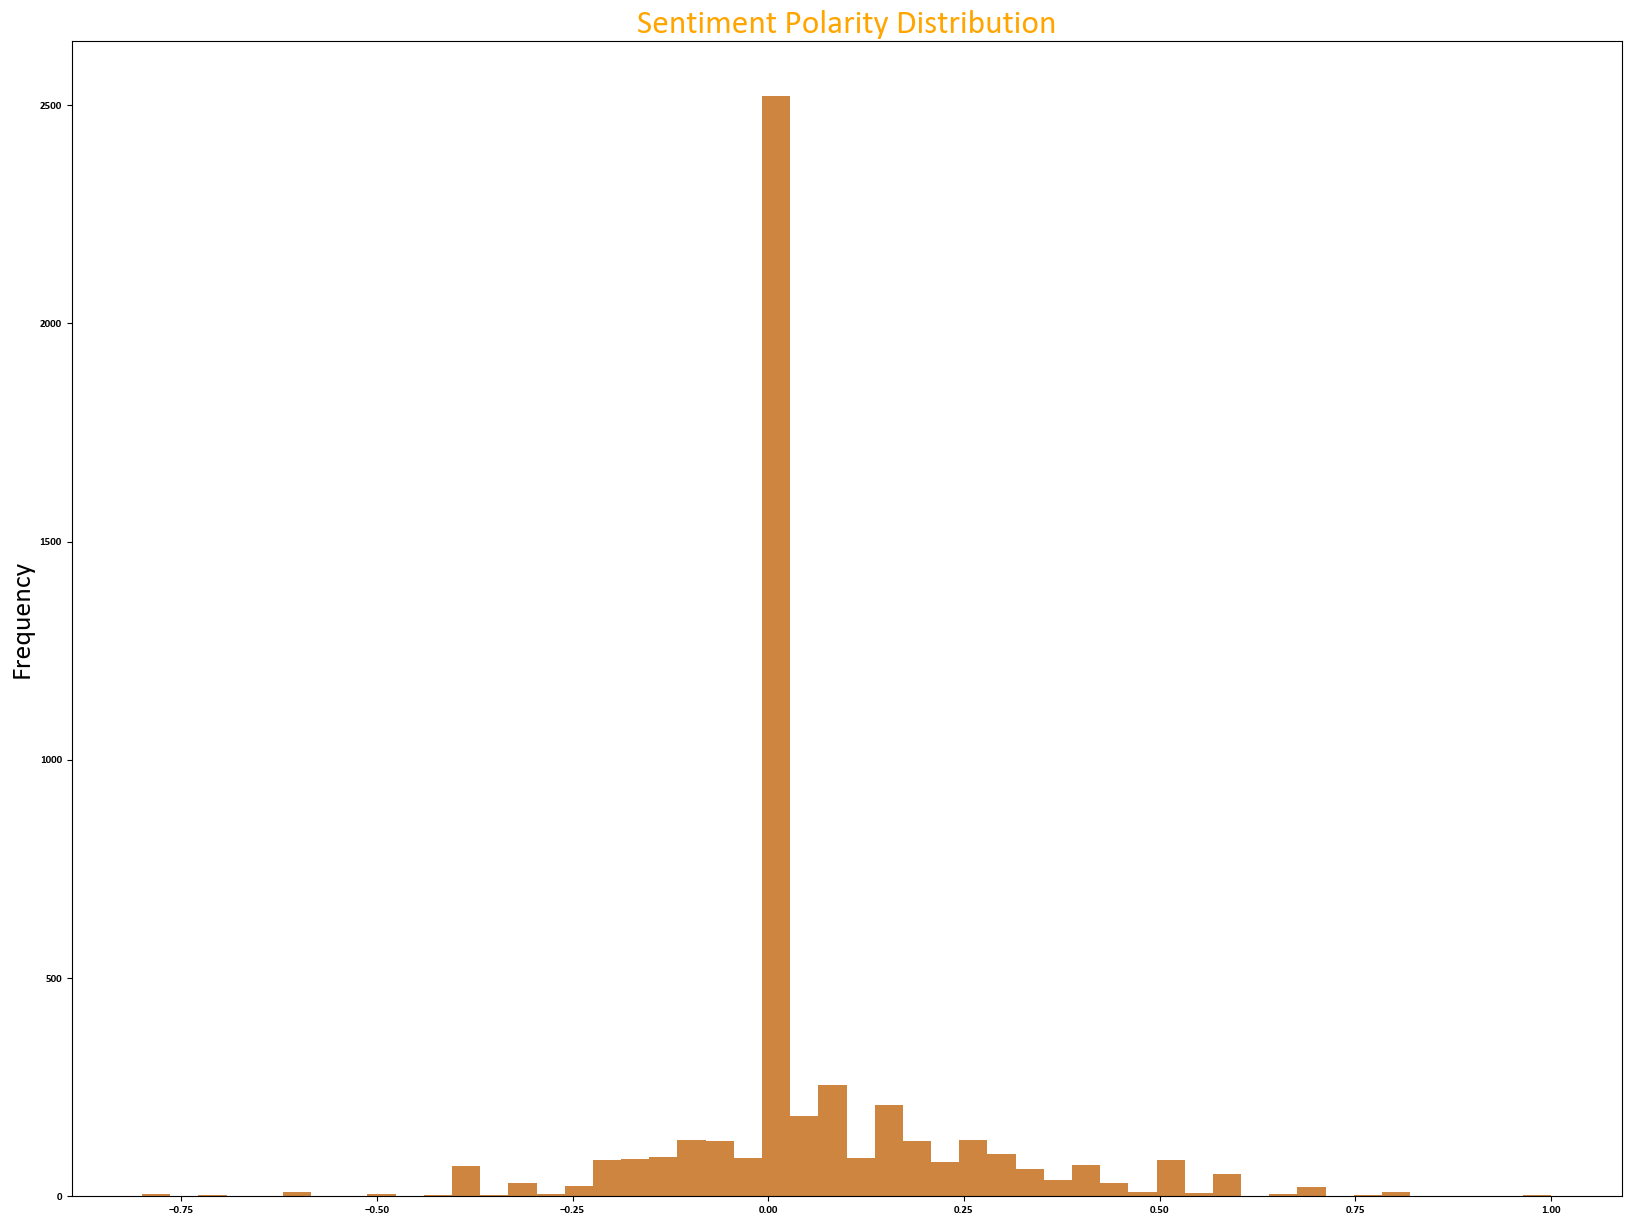

In [82]:
df['polarity'].plot(
    kind='hist',
    bins=50,
    color="peru",
    title='Sentiment Polarity Distribution');plt.show()

In [83]:
p_s=df[df["polarity"]>0].count()["sentiment"]
neu_s=df[df["polarity"]==0].count()["sentiment"]
neg_s=df[df["polarity"]<0].count()["sentiment"]

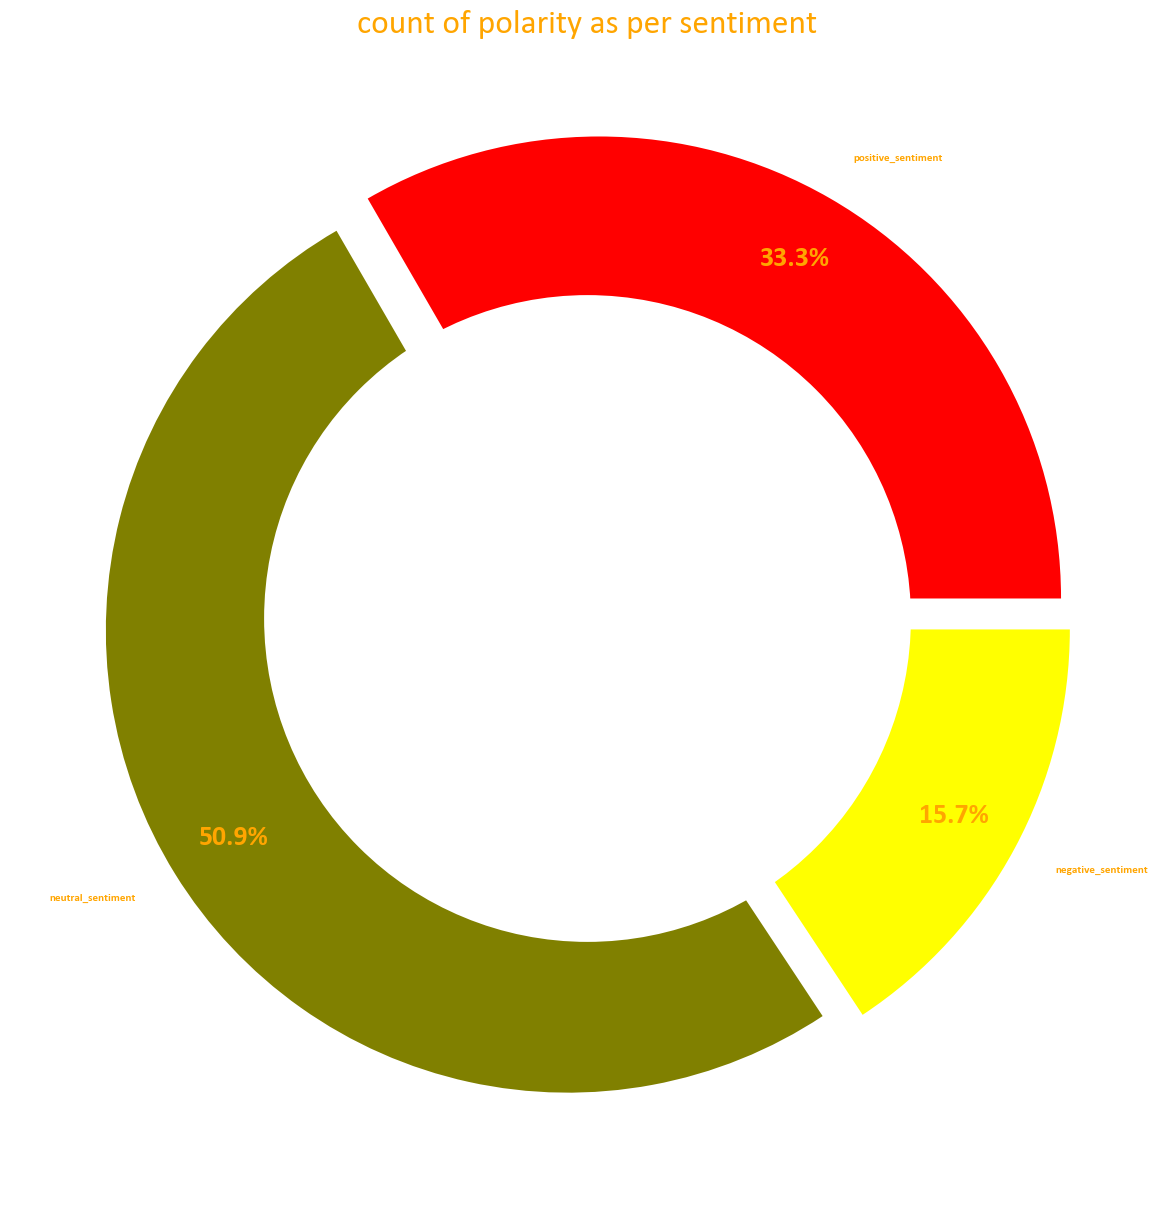

In [84]:
# Setting labels for items in Chart
sentiment = ['positive_sentiment',"neutral_sentiment","negative_sentiment"]
  
# Setting size in Chart based on 
# given values
values = [p_s,neu_s,neg_s]
  
# colors
colors = ['#FF0000', 'olive', '#FFFF00']
# explosion
explode = (0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(values, colors=colors, labels=sentiment,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('count of polarity as per sentiment')
  
# Displaing Chart
plt.show()

<Axes: >

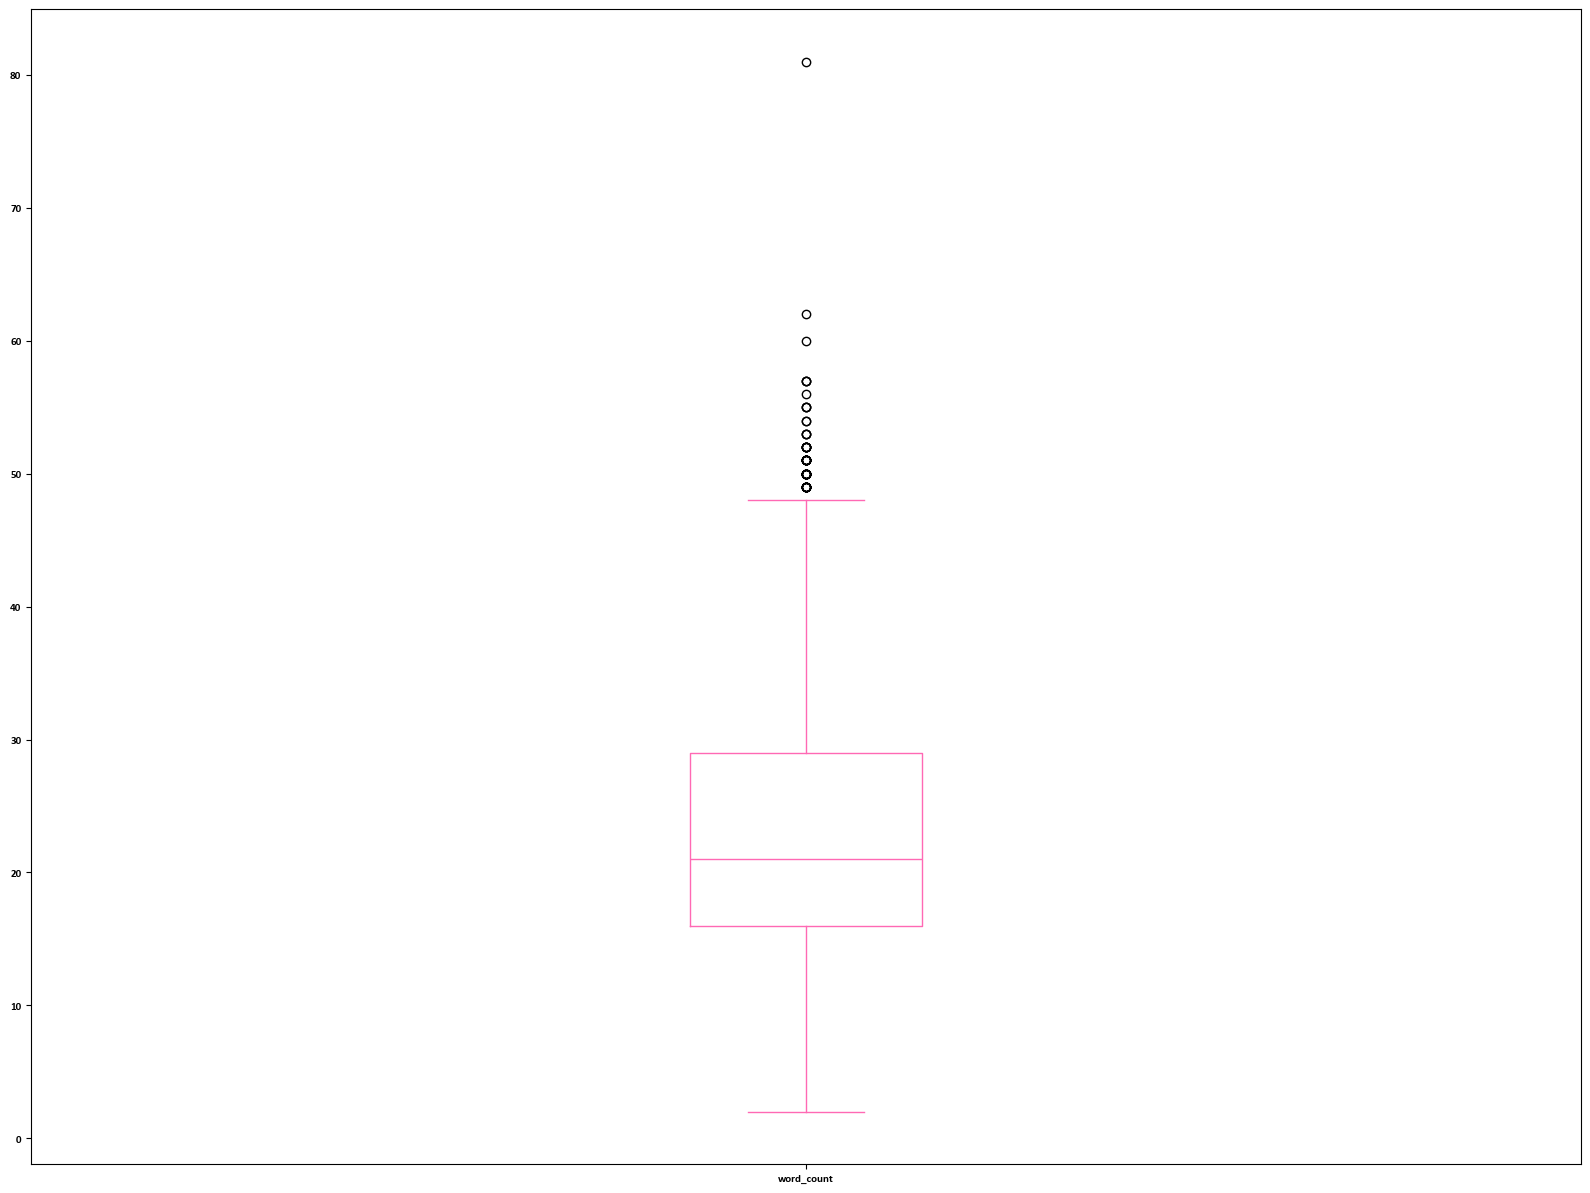

In [85]:
df.plot.box(y=["word_count"],color="hotpink")

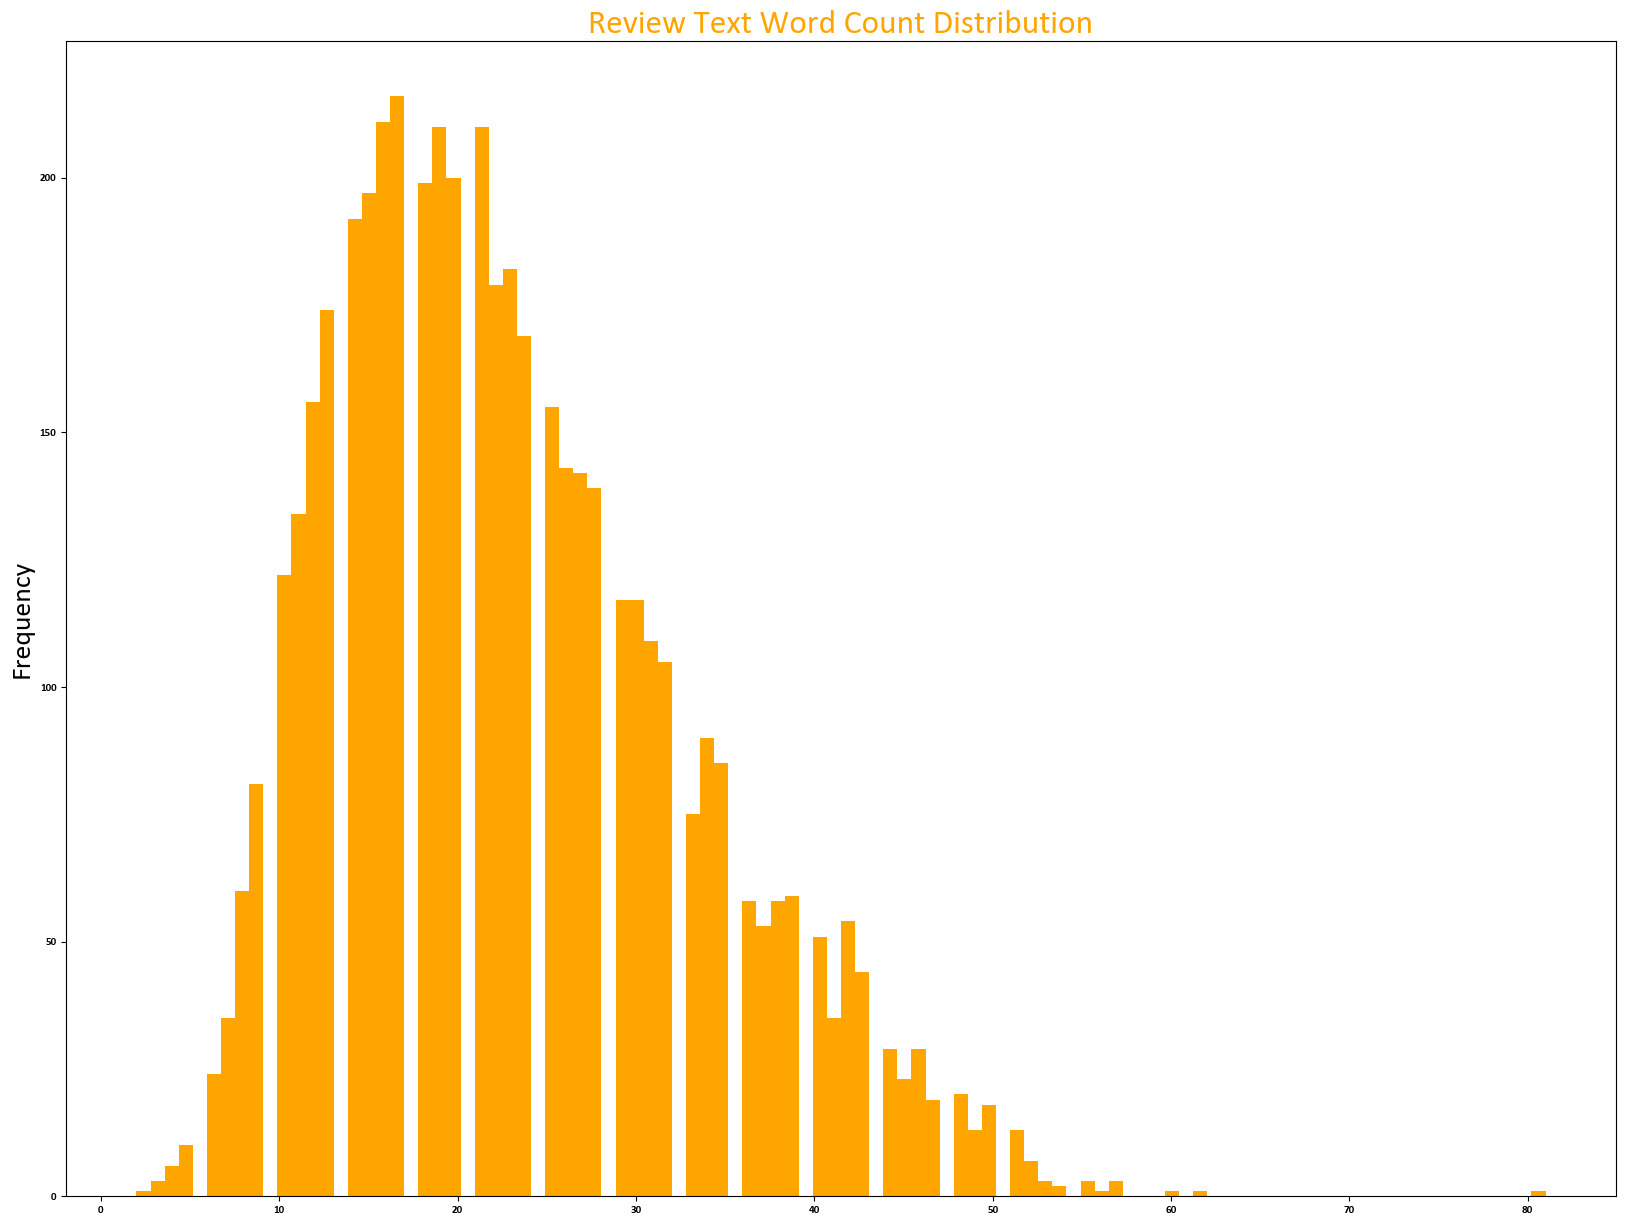

In [86]:
df['word_count'].plot(
    kind='hist',
    bins=100,
    color="orange",
    title='Review Text Word Count Distribution');plt.show()

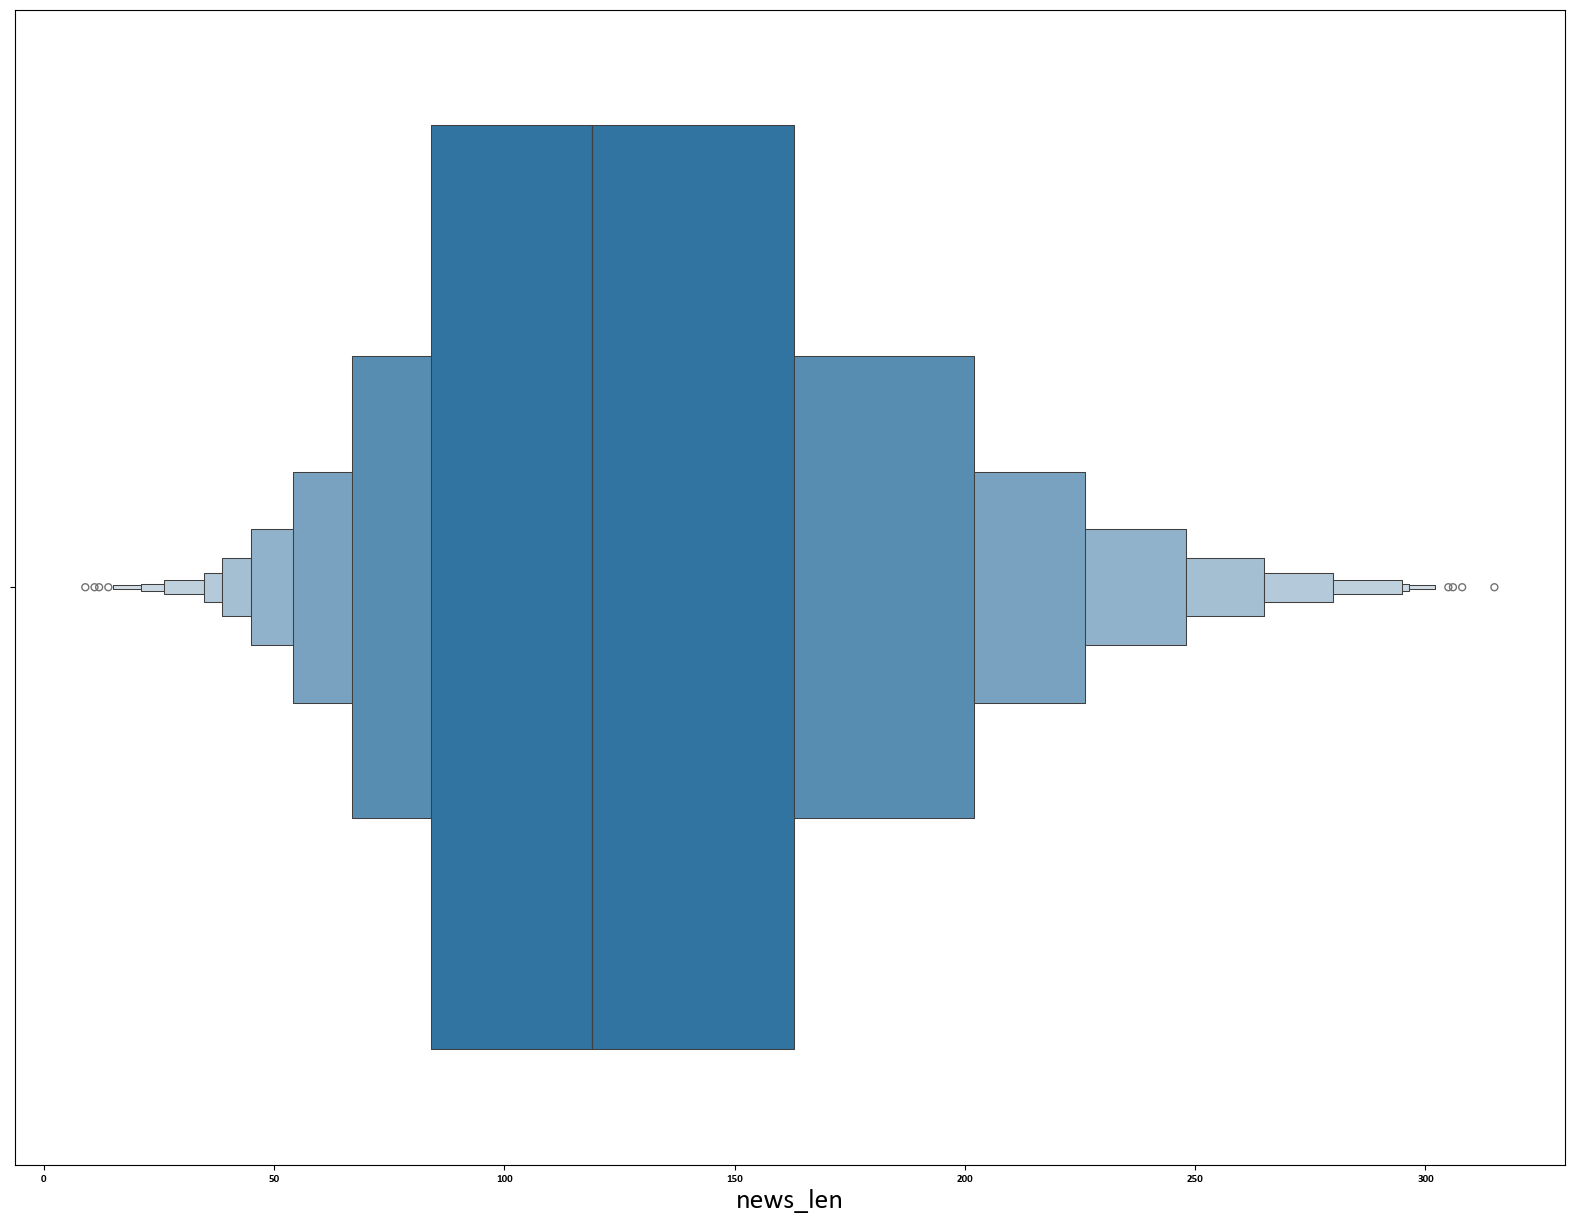

In [87]:
sns.boxenplot(x="news_len",data=df);plt.show()

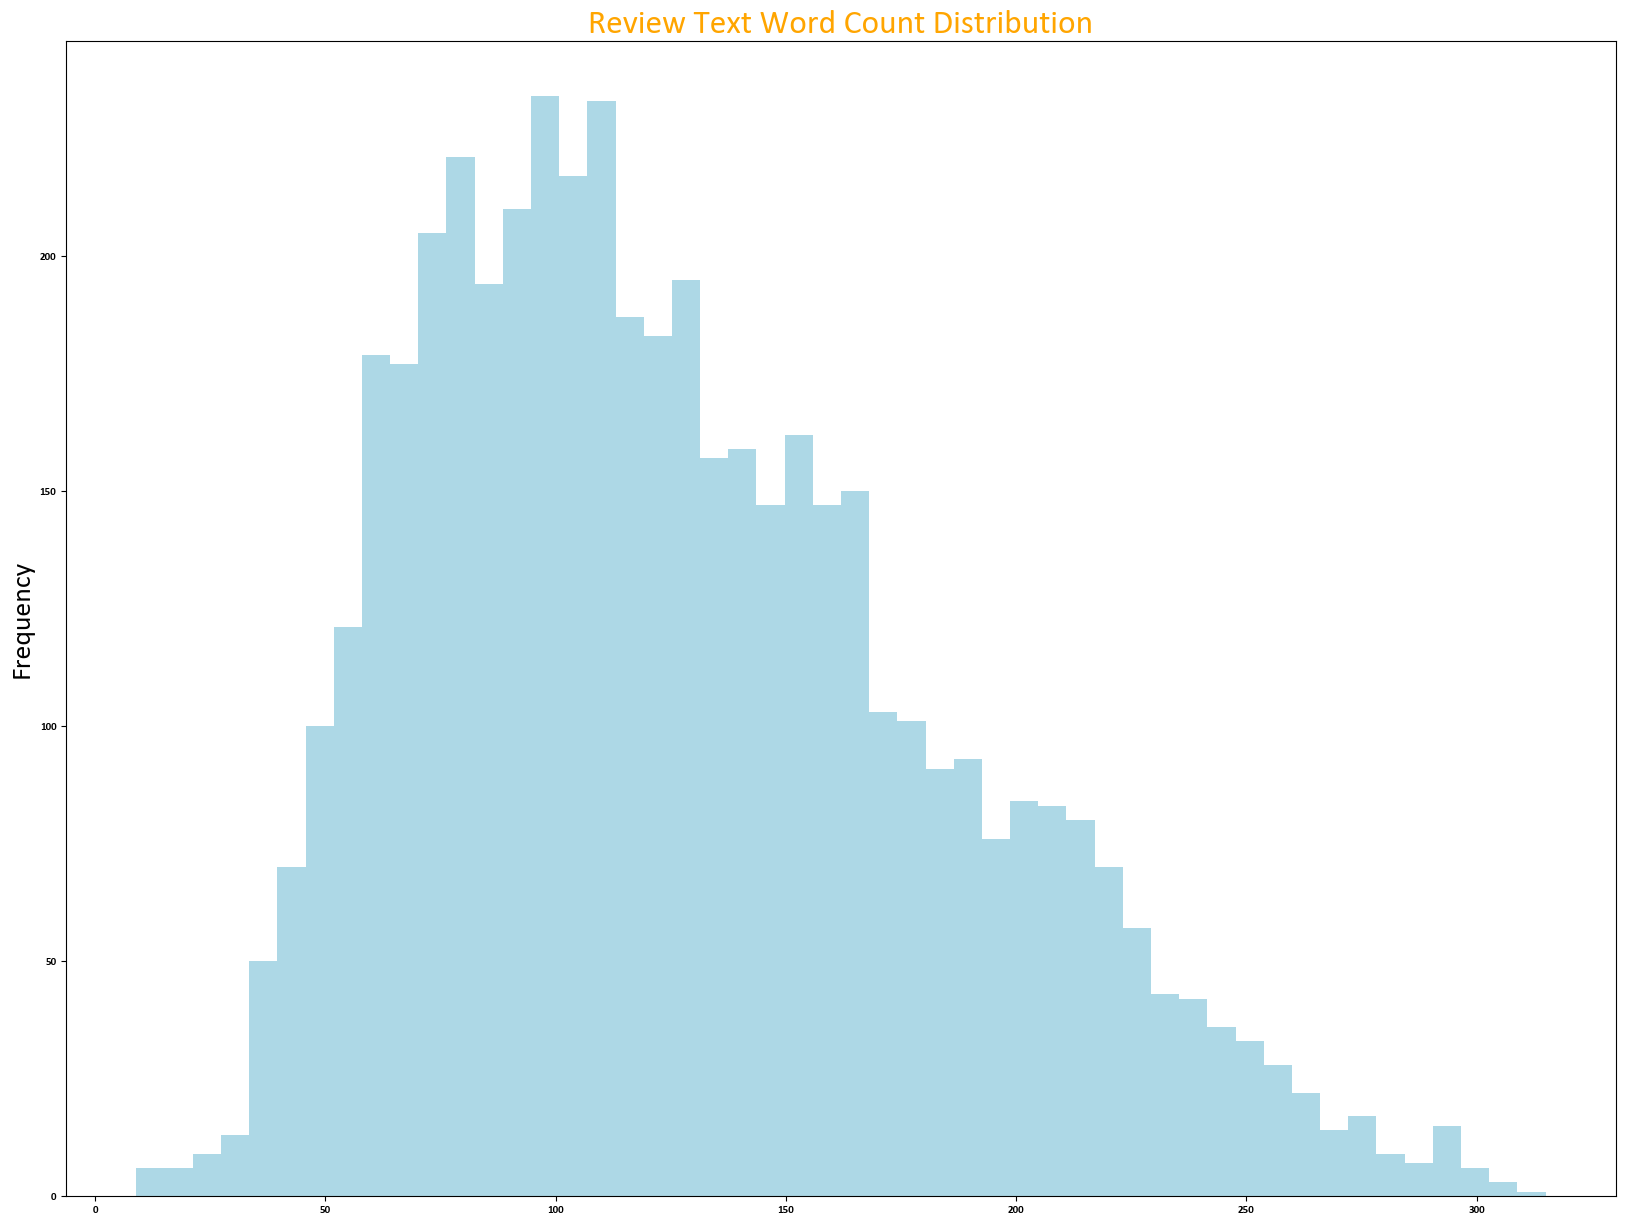

In [88]:
df['news_len'].plot(
    kind='hist',
    bins=50,
    color="lightblue",
    title='Review Text Word Count Distribution');plt.show()

In [89]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [91]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [92]:
fig = px.scatter(df, x="news_len", y="word_count", color="sentiment", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.show()

the 6069
of 3215
in 2984
and 2596
to 2523
for 1152
eur 1018
is 930
company 851
will 850
from 769
on 727
its 646
has 578
with 573
by 559
said 545
as 544
be 542
finnish 524


,ReviewText,count
0,the,6069
1,of,3215
2,in,2984
3,and,2596
4,to,2523
5,for,1152
6,eur,1018
7,is,930
8,company,851
9,will,850


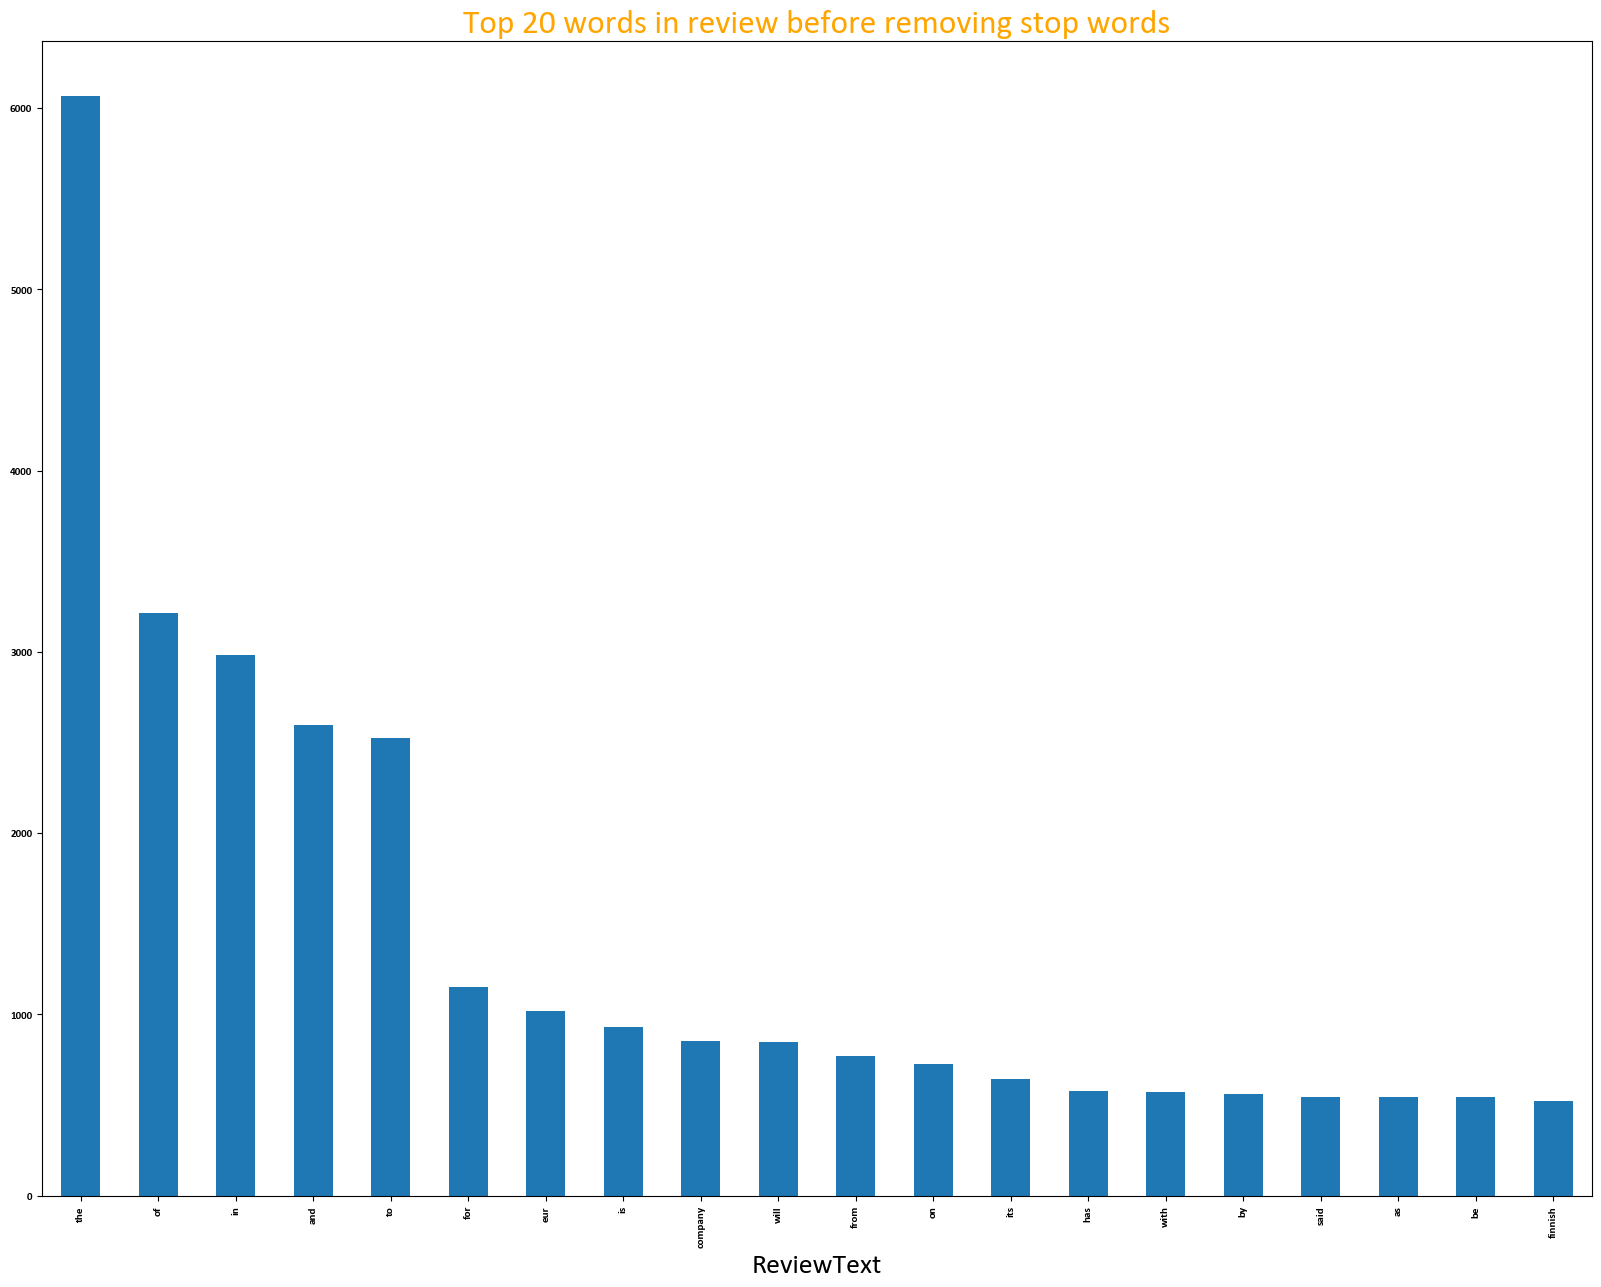

In [93]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 20 words in review before removing stop words')
df1

eur 1018
company 851
said 545
finnish 524
mn 515
sales 455
million 440
net 413
profit 410
year 395
finland 353
group 324
2009 302
operating 299
2008 297
mln 291
new 277
business 270
period 266
quarter 258


<Axes: title={'center': 'Top 20 words in review after removing stop words'}, xlabel='ReviewText'>

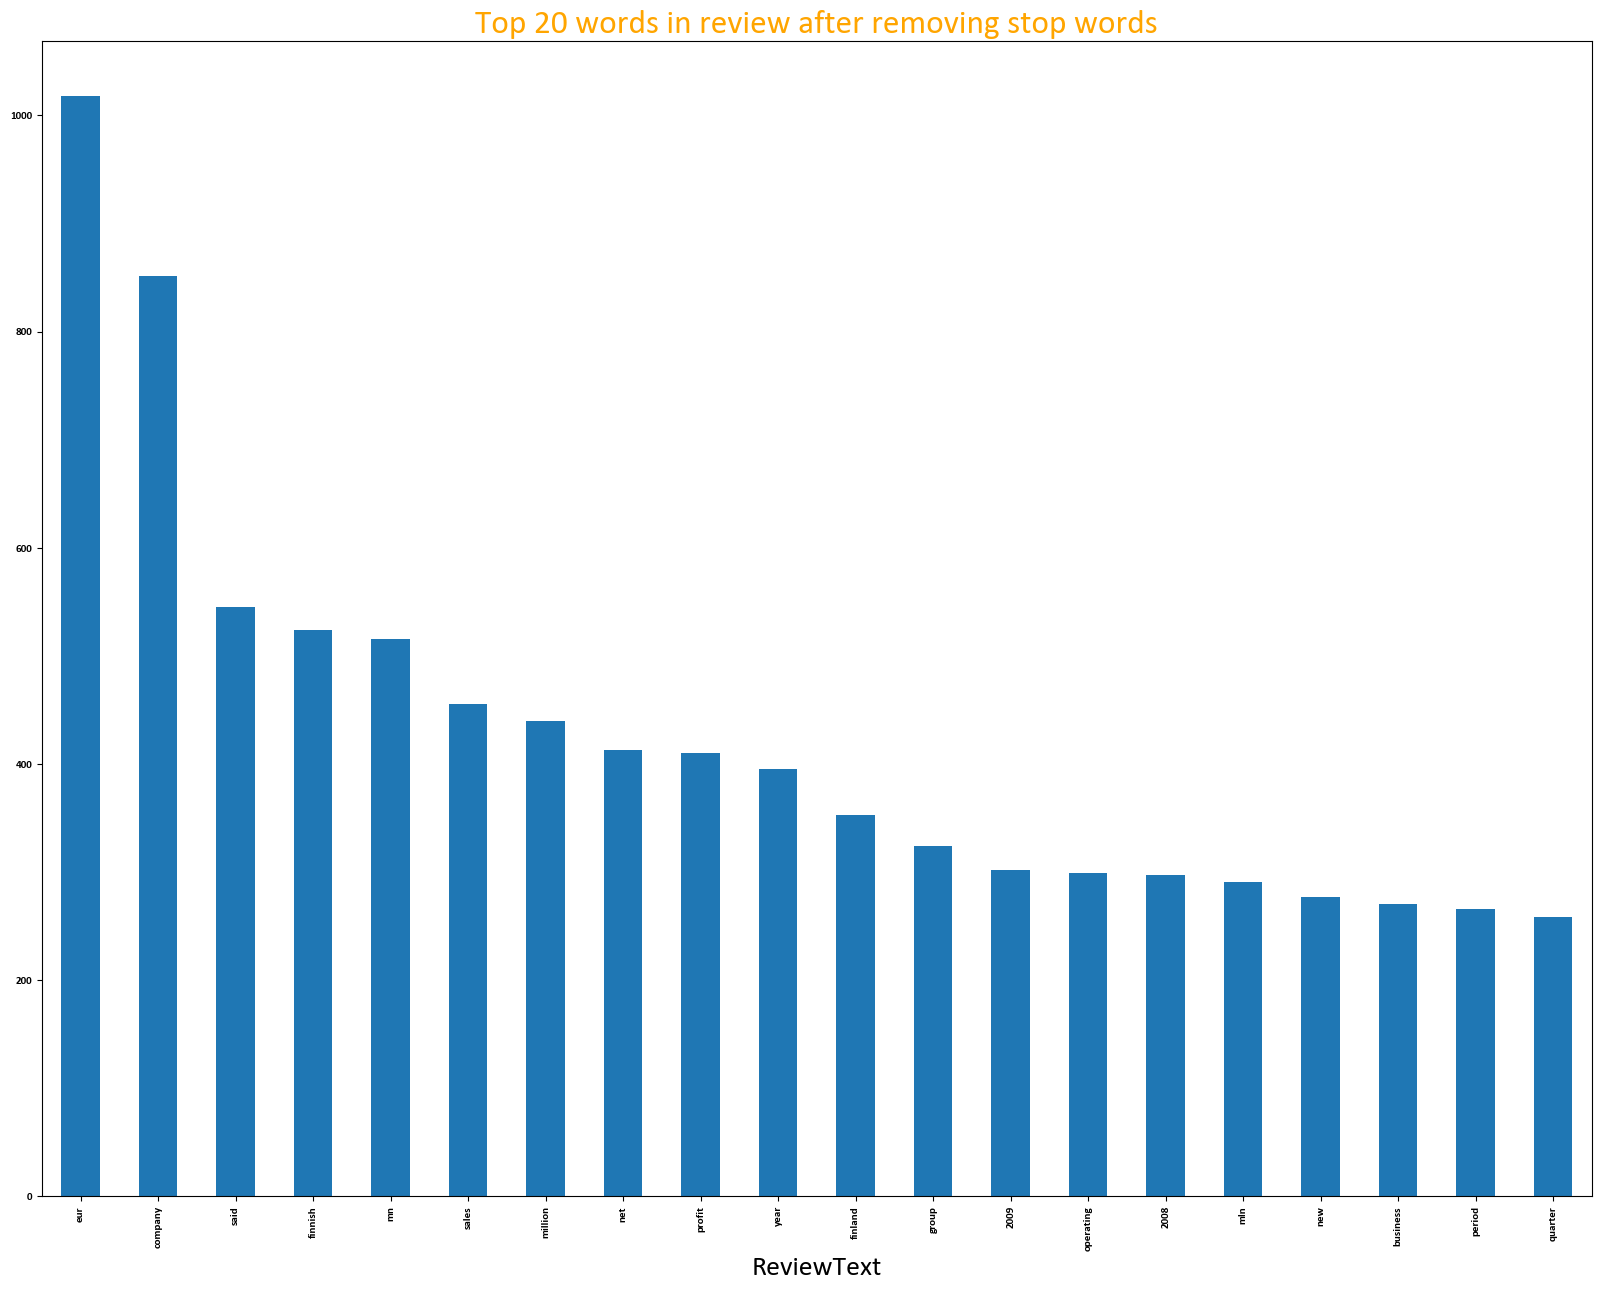

In [94]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words in review after removing stop words')

in the 804
of the 719
the company 504
for the 356
will be 272
net sales 246
to the 242
to eur 227
from eur 210
eur mn 196
operating profit 194
mn in 190
and the 182
on the 175
the first 159
quarter of 155
in finland 153
to be 153
of eur 144
at the 125


<Axes: title={'center': 'Top 20 bigrams in review before removing stop words'}, xlabel='ReviewText'>

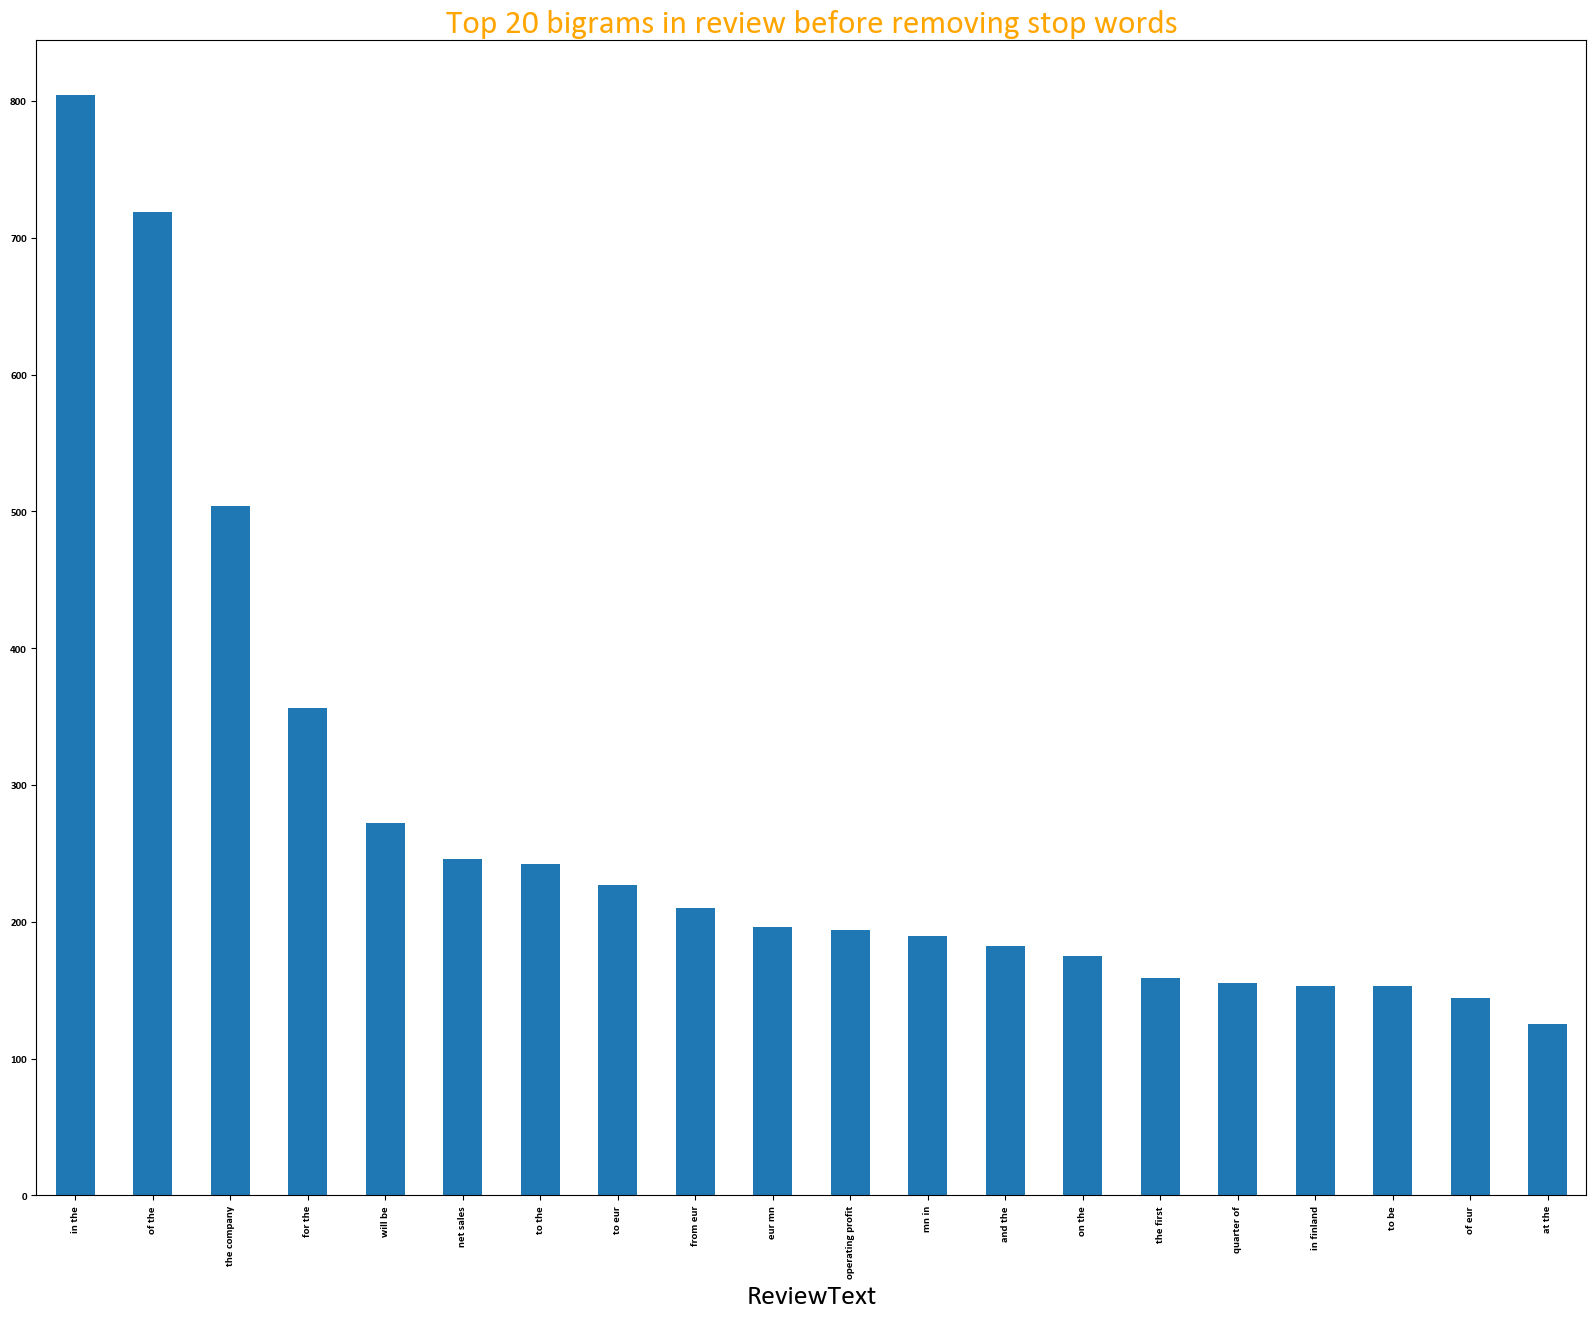

In [95]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 20 bigrams in review before removing stop words')

net sales 246
eur mn 196
operating profit 194
mn eur 127
corresponding period 108
mln euro 107
net profit 93
said today 86
oyj hel 85
company said 73
eur million 72
omx helsinki 63
profit eur 60
second quarter 57
euro mln 57
year earlier 56
mn corresponding 54
totalled eur 48
mln eur 48
net loss 47


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='ReviewText'>

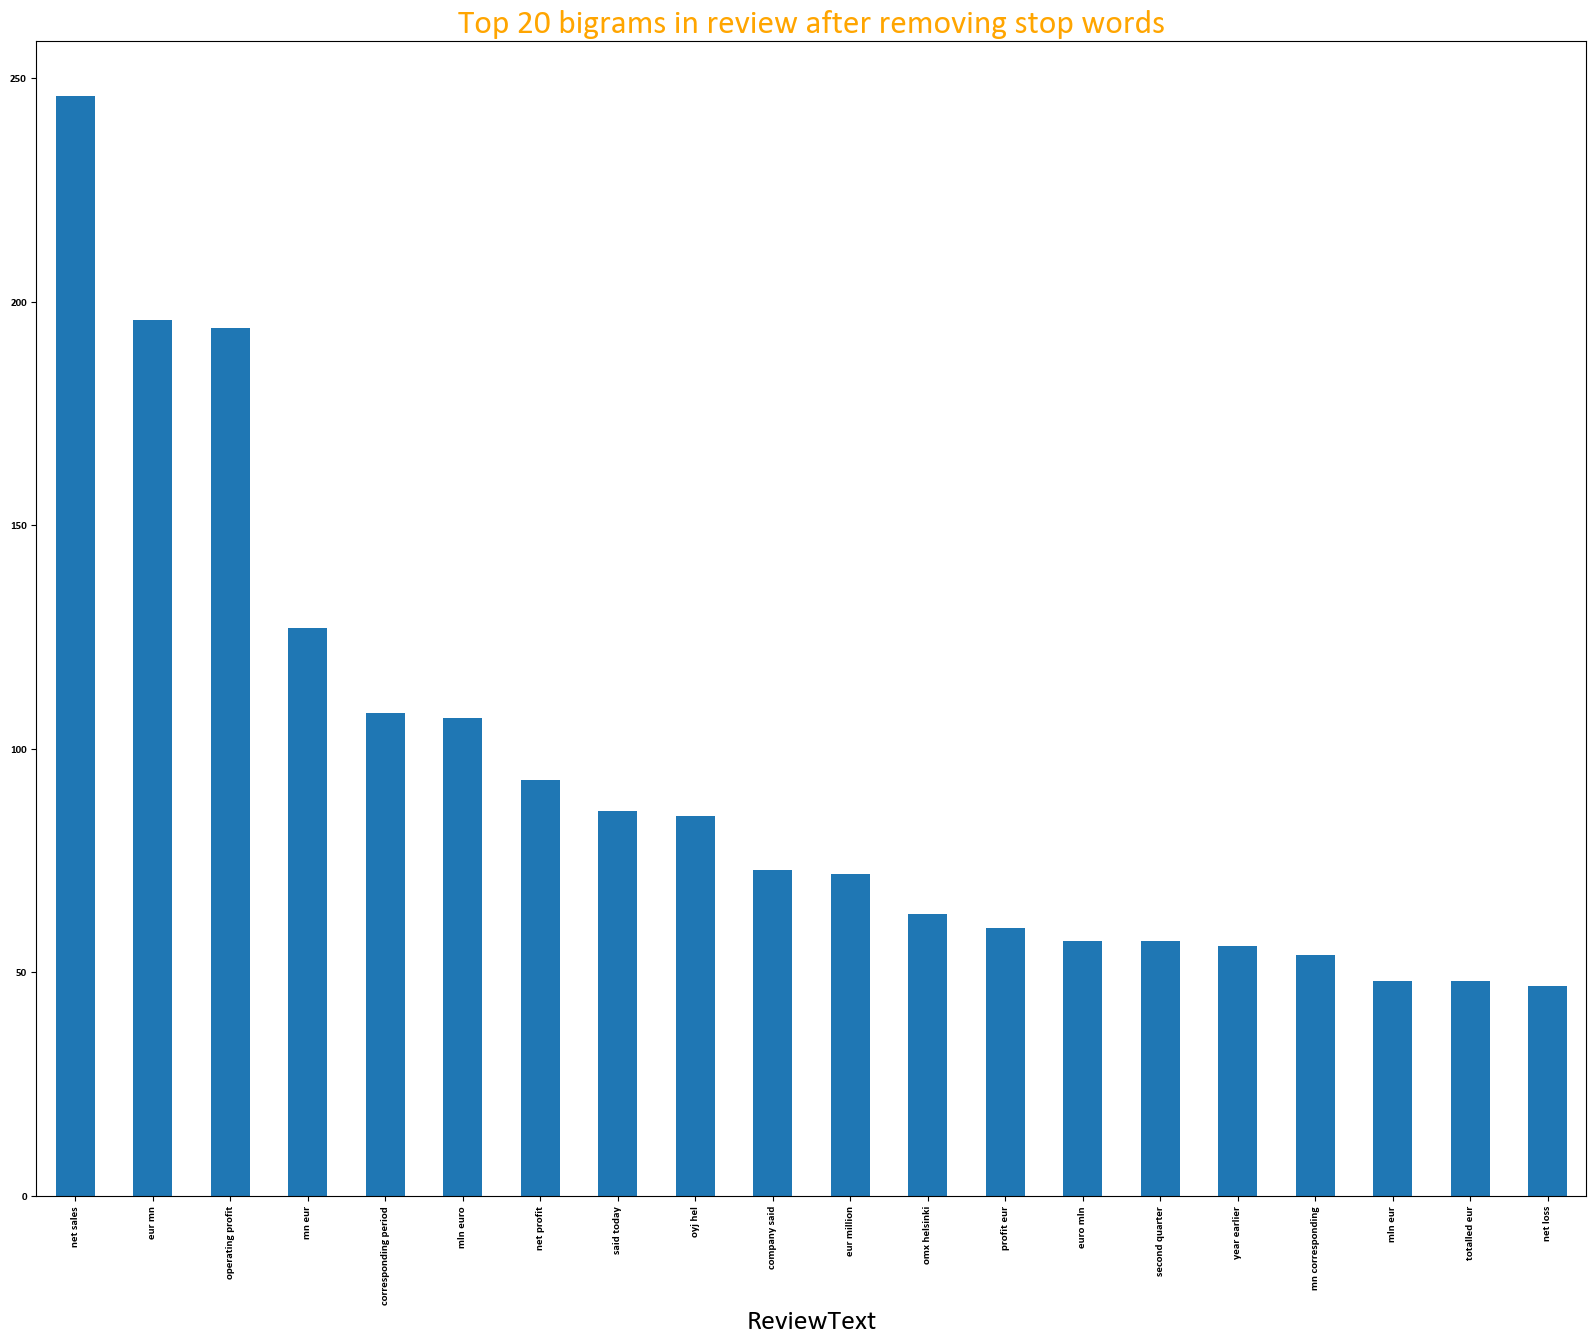

In [96]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')

mn in the 120
the corresponding period 108
corresponding period in 87
as well as 82
in the first 76
mn from eur 73
eur mn in 73
in the corresponding 73
the end of 68
net sales of 66
the first quarter 58
the company said 57
the third quarter 53
from eur mn 52
value of the 52
the second quarter 51
mln euro mln 51
the same period 49
in the second 46
first quarter of 44


<Axes: title={'center': 'Top 20 trigrams in review before removing stop words'}, xlabel='ReviewText'>

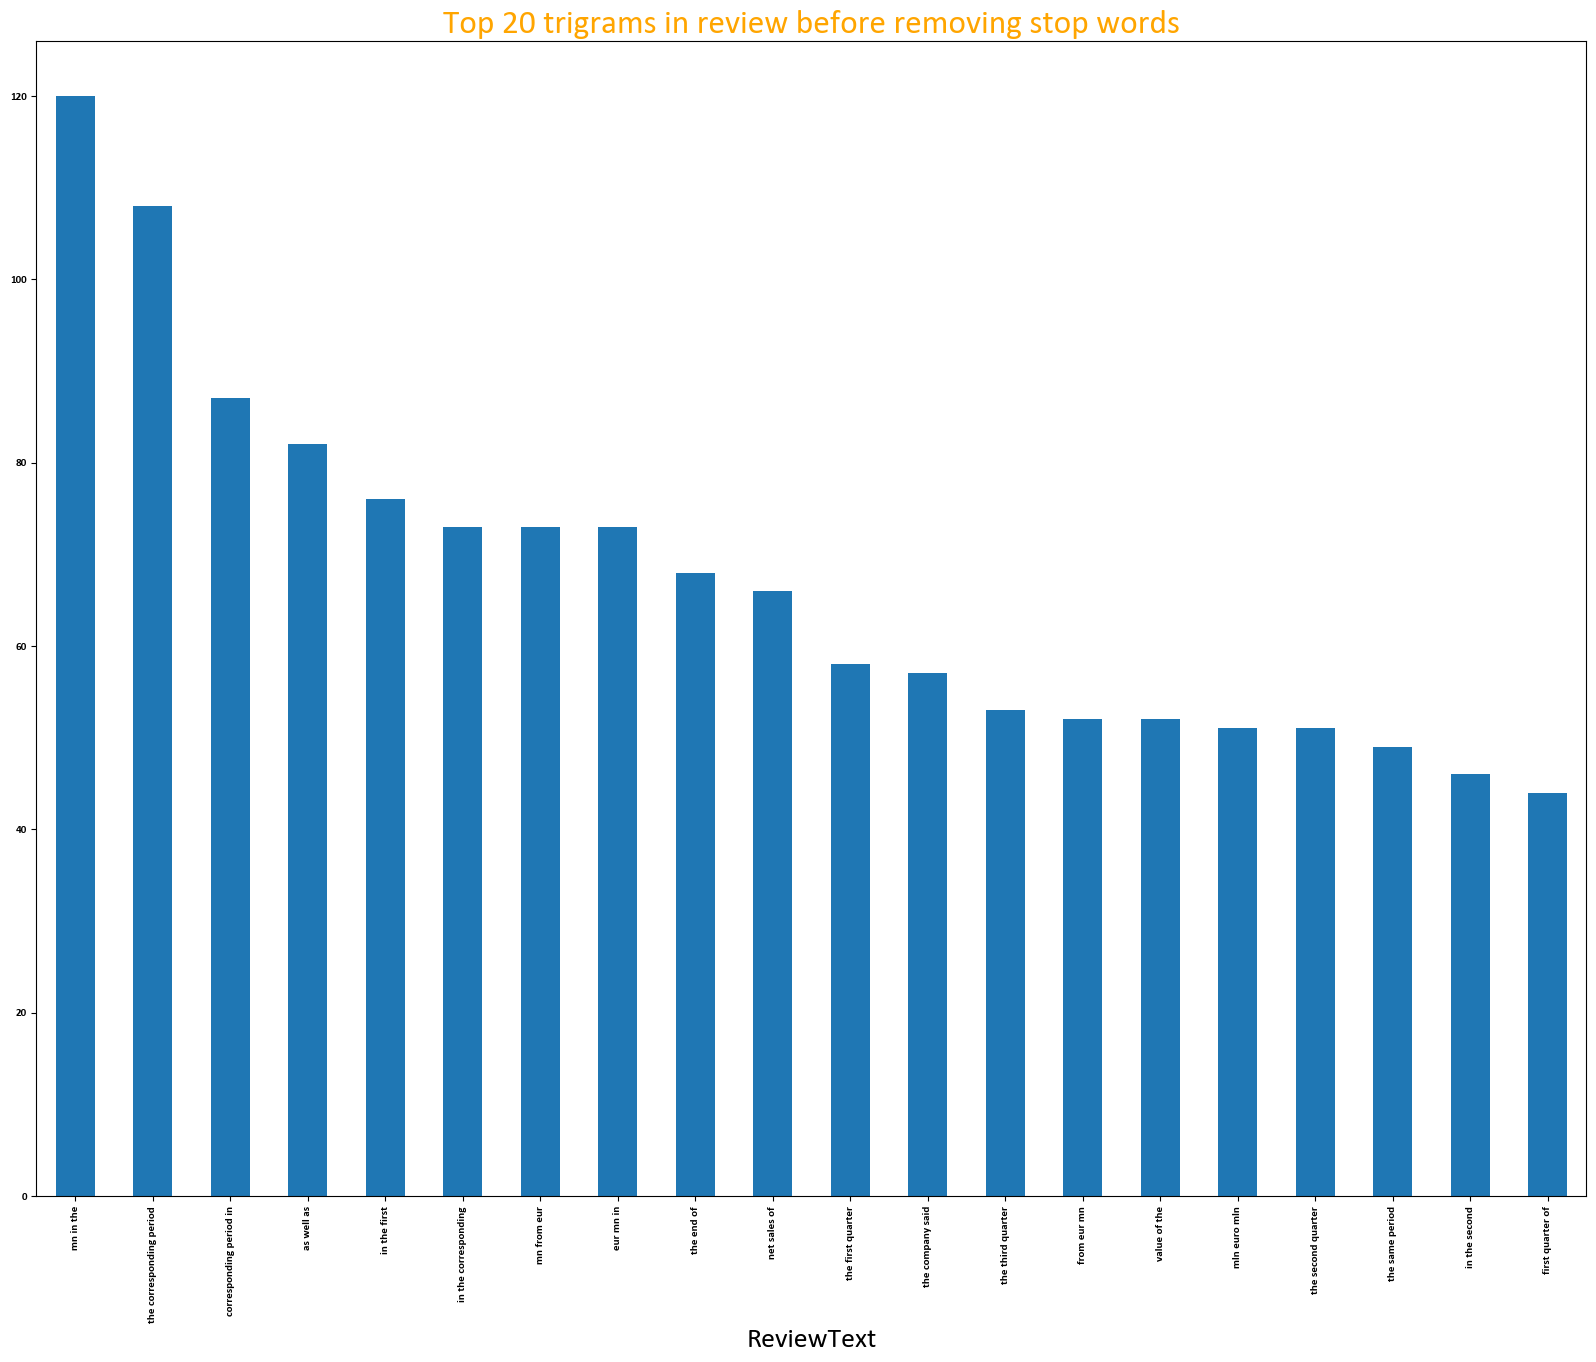

In [97]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')

mn corresponding period 54
mln euro mln 51
eur mn eur 42
mn eur mn 41
net sales eur 30
profit eur mn 29
profit rose eur 27
earnings share eps 27
said today net 26
eur mn corresponding 25
eur mn compared 25
operating profit eur 24
corresponding period 2005 23
totalled eur mn 23
non recurring items 22
operating profit rose 21
corresponding period 2009 21
stock exchange release 21
net sales increased 20
month period increased 19


<Axes: title={'center': 'Top 20 trigrams in review after removing stop words'}, xlabel='ReviewText'>

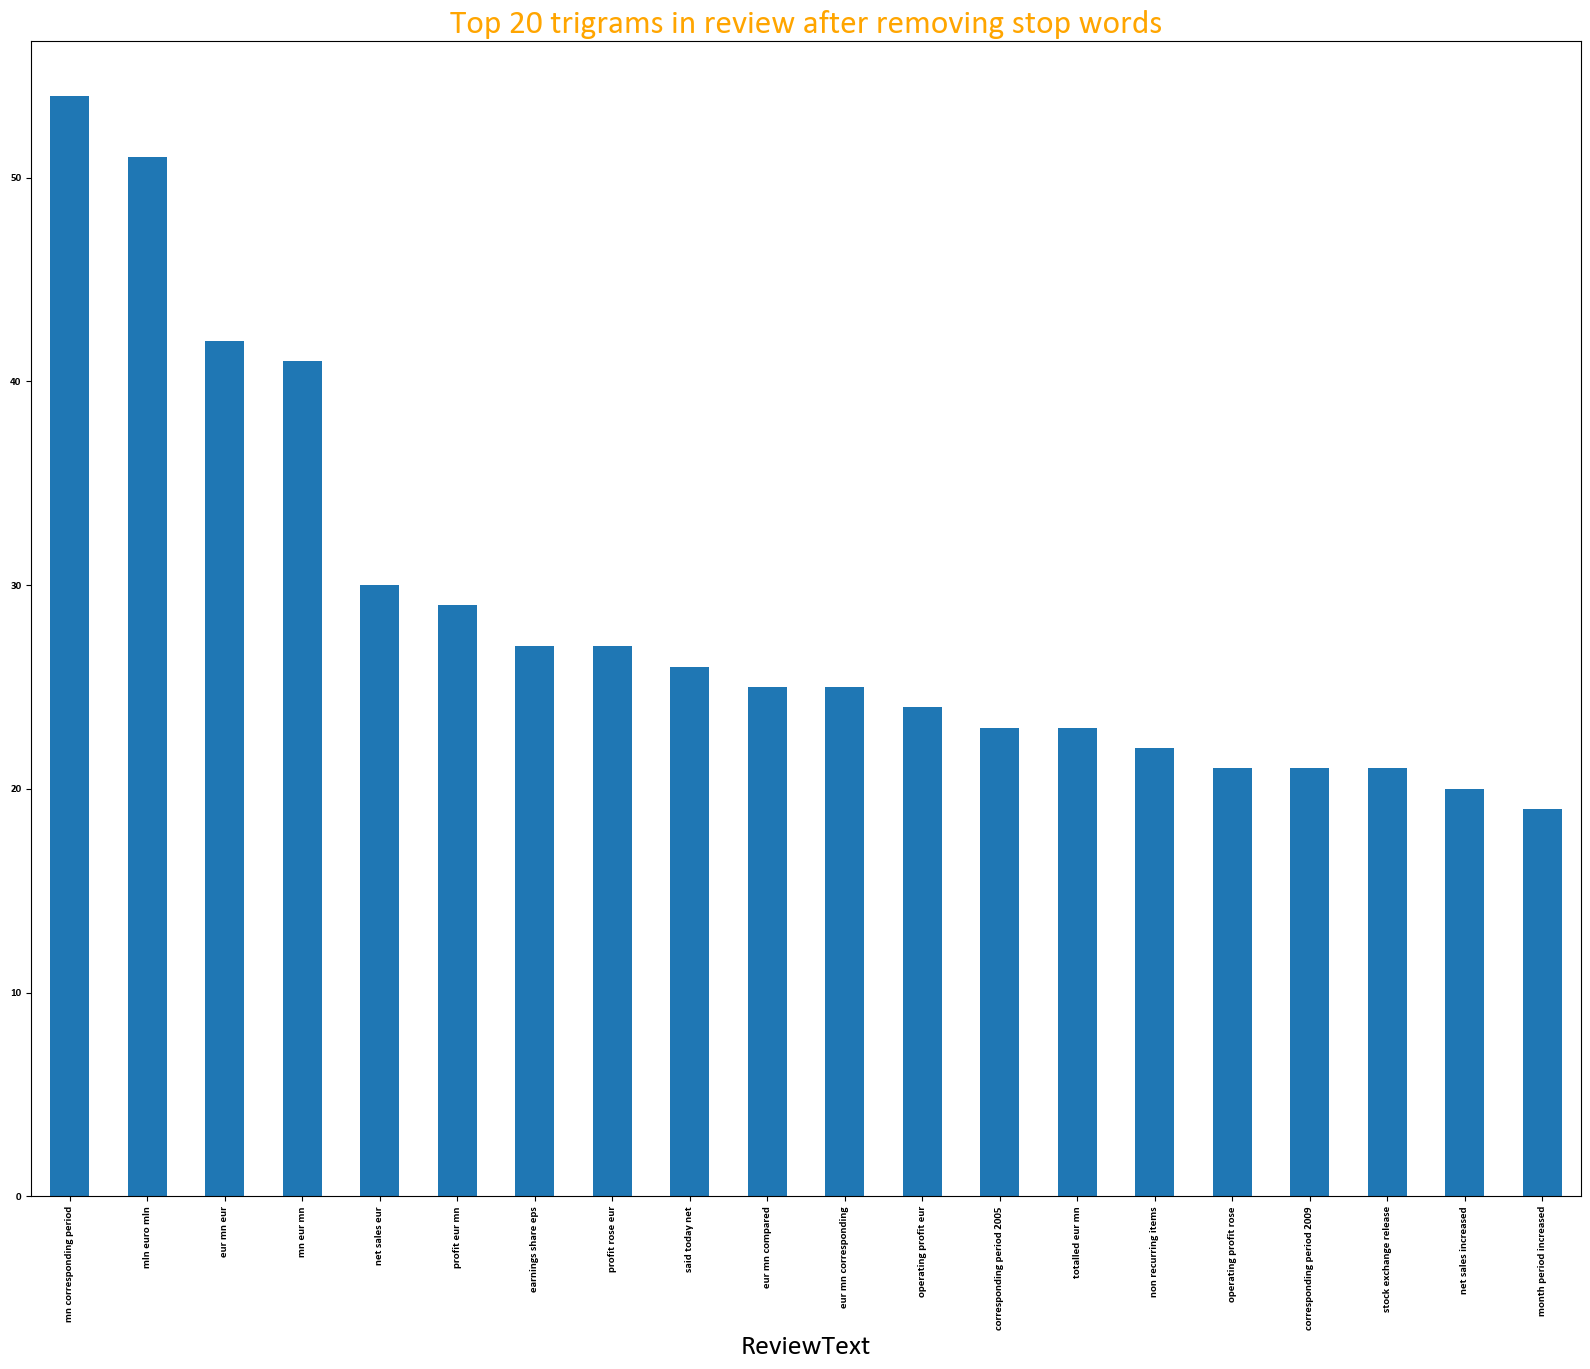

In [98]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' ,'count'])
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')

In [99]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to C:\Users\Neil
[nltk_data]     Basu\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Neil
[nltk_data]     Basu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Neil
[nltk_data]     Basu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Neil Basu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Neil
[nltk_data]     Basu\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Neil
[nltk_data]     Basu\AppData\Roaming\nltk_data...
[nltk_data]   Pack

<Axes: title={'center': 'Top 20 Part-of-speech tagging for review corpus'}, xlabel='pos'>

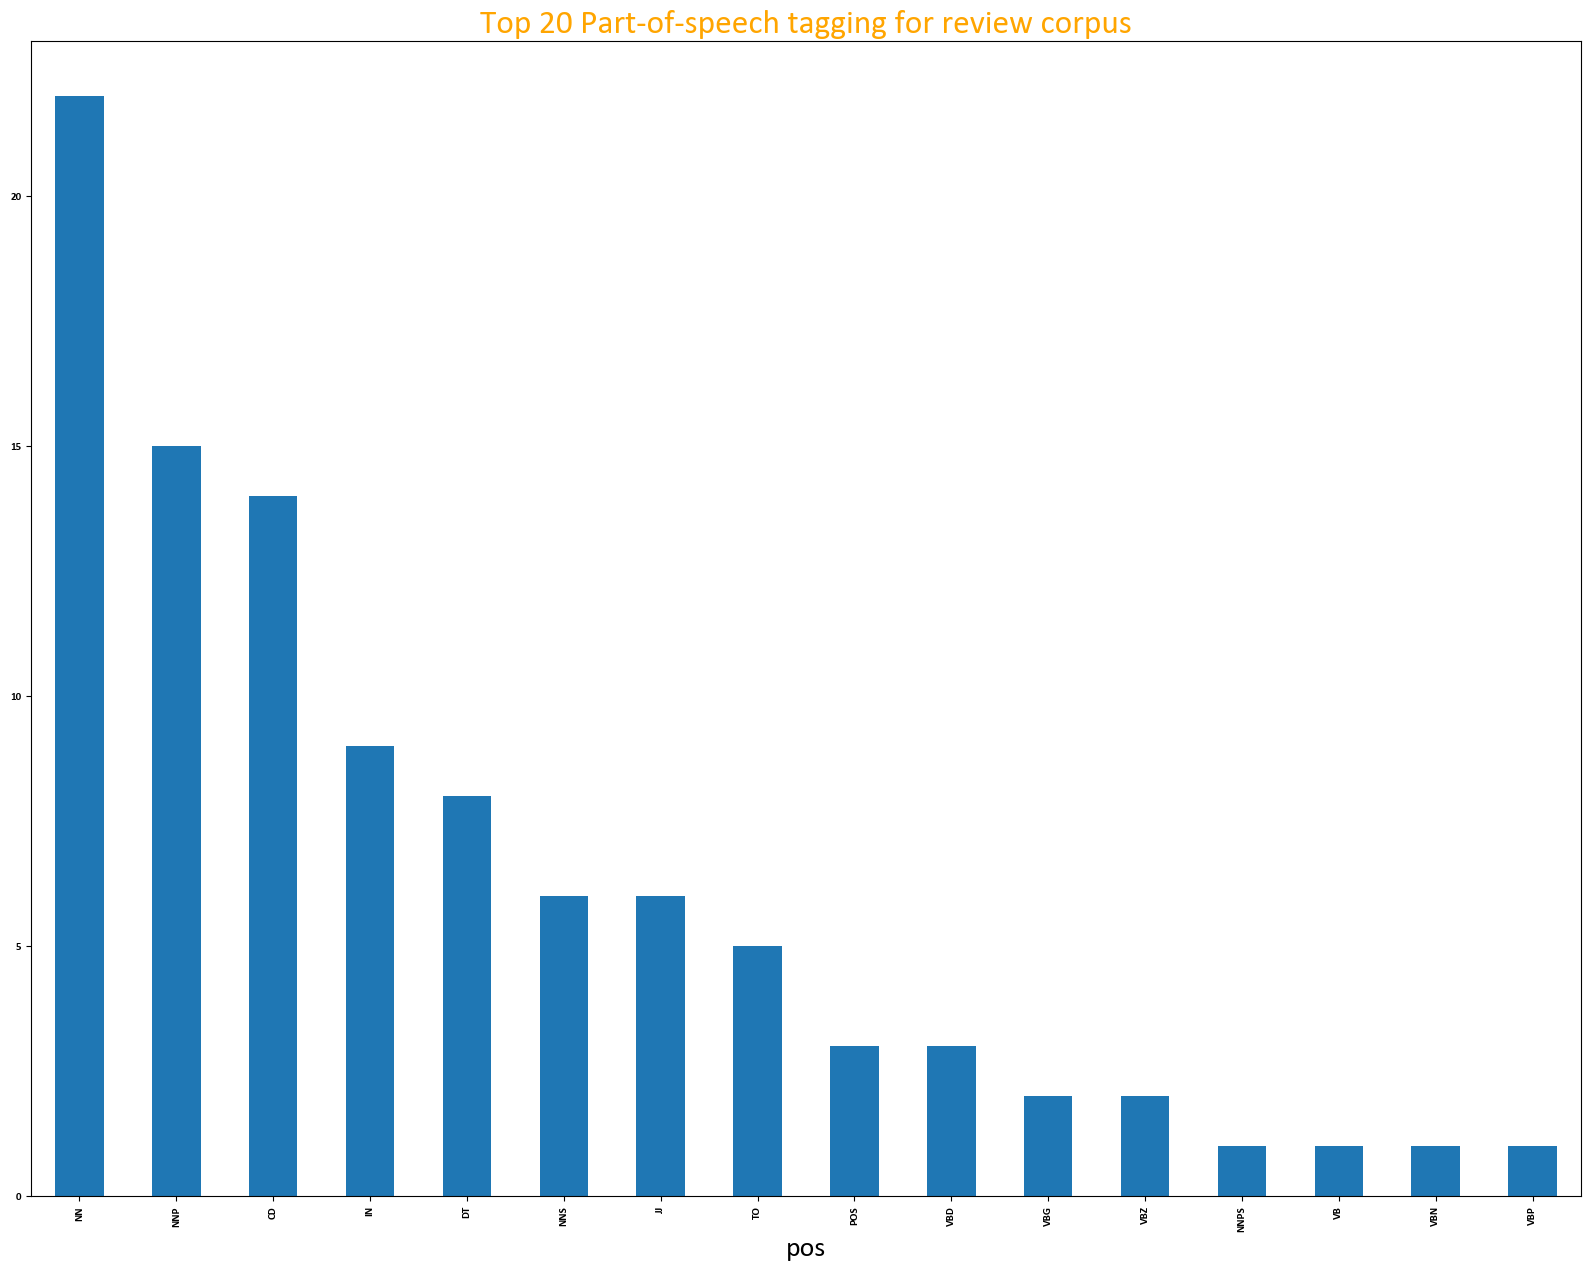

In [100]:
import nltk
blob = TextBlob(str(df['Review Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar',
    title='Top 20 Part-of-speech tagging for review corpus')

In [101]:
y0 = df.loc[df['sentiment'] == 'positive']['polarity']
y1 = df.loc[df['sentiment'] == 'negative']['polarity']
y2 = df.loc[df['sentiment'] == 'neutral']['polarity']

trace0 = go.Box(
    y=y0,
    name = 'positive',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'negative',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'neutral',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Polarity Boxplot according to sentiment"
)

go.Figure(data=data,layout=layout)

In [102]:
y0 = df.loc[df['sentiment'] == 'positive']['news_len']
y1 = df.loc[df['sentiment'] == 'negative']['news_len']
y2 = df.loc[df['sentiment'] == 'neutral']['news_len']


trace0 = go.Box(
    y=y0,
    name = 'positive',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'negative',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'neutral',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "news length Boxplot by sentiment"
)
go.Figure(data=data,layout=layout)

In [103]:
xp = df.loc[df['sentiment'] == "positive", 'polarity']
xneu = df.loc[df['sentiment'] == "neutral", 'polarity']
xneg= df.loc[df['sentiment'] == "negative", 'polarity']

trace1 = go.Histogram(
    x=xp, name='positive',
    opacity=0.75
)
trace2 = go.Histogram(
    x=xneu, name = 'neutral',
    opacity=0.75
)
trace3 = go.Histogram(
    x=xneg, name = 'negative',
    opacity=0.75
)
data = [trace1, trace2,trace3]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity')
go.Figure(data=data, layout=layout)

In [104]:
trace1 = go.Scatter(
    x=df['polarity'], y=df['news_len'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['polarity'], y=df['news_len'], name='density', ncontours=50,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['news_len'], name='news length density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='x unified',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)
go.Figure(data=data, layout=layout)

In [105]:
trace1 = go.Scatter(
    x=df['polarity'], y=df['word_count'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['polarity'], y=df['word_count'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['word_count'], name='word count density', marker=dict(color='rgb(112,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

go.Figure(data=data, layout=layout)

In [106]:
%pip install scattertext
%pip install spacy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [107]:
import scattertext as st
import spacy
nlp = spacy.blank("en")
nlp.add_pipe('sentencizer')
corpus = st.CorpusFromPandas(df, category_col='sentiment', text_col='Review Text', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:20]))

['oyj', 'omx', 'basware', 'ruukki', 'elcoteq', 'mln', 'capman', 'cargotec', 'teleste', 'poyry', 'scanfil', 'aspocomp', 'incap', 'cramo', 'tikkurila', 'glaston', 'okmetic', 'outotec', 'yit', 'sanoma']


In [108]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['positive_sentiment'] = corpus.get_scaled_f_scores('positive')
list(term_freq_df.sort_values(by='positive_sentiment', ascending=False).index[:20])

['up from',
 'rose to',
 ', up',
 'profit rose',
 'rose',
 'grew',
 'won',
 'increased',
 'awarded',
 'increased by',
 'signed',
 'to increase',
 'increase',
 '% to',
 'signed a',
 'growth',
 'positive',
 'mn from',
 'its net',
 'year -']

In [109]:
term_freq_df['neutral_sentiment'] = corpus.get_scaled_f_scores('neutral')
list(term_freq_df.sort_values(by='neutral_sentiment', ascending=False).index[:20])

['approximately',
 'not',
 'includes',
 'no',
 'shares',
 'as well',
 'value of',
 ', finland',
 'development',
 'well as',
 'rights',
 'value',
 'board',
 'will be',
 'is',
 'is a',
 'oy',
 'capital',
 'the board',
 'media']

In [110]:
term_freq_df['negative_sentiment'] = corpus.get_scaled_f_scores('negative')
list(term_freq_df.sort_values(by='negative_sentiment', ascending=False).index[:20])

['down from',
 'decreased to',
 ', down',
 'decreased',
 'down',
 'fell',
 'a profit',
 'decreased by',
 'fell to',
 'lay',
 'operating loss',
 'lower',
 'first half',
 'off',
 'profit fell',
 'half',
 'items',
 'half of',
 'sales decreased',
 'profit decreased']

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import numpy as np

tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = df['Review Text'].values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data).toarray()
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = np.zeros(document_term_matrix.shape[1])
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[-n:], 0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1, document_term_matrix.shape[1]))
            temp_word_vector[:, index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)
        top_words.append(" ".join(topic_words))         
    return top_words
    
top_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

In [112]:
for i in range(len(top_lsa)):
    print("Topic {}:".format(i+1), top_lsa[i])

Topic 1: eur mn profit
Topic 2: ðl eur11m eur13
Topic 3: mln euro net
Topic 4: sales million net
Topic 5: million value eur
Topic 6: share eur0 capital
Topic 7: sales increase expected
Topic 8: said 2010 finnish
Topic 9: year services new
Topic 10: company shares 000


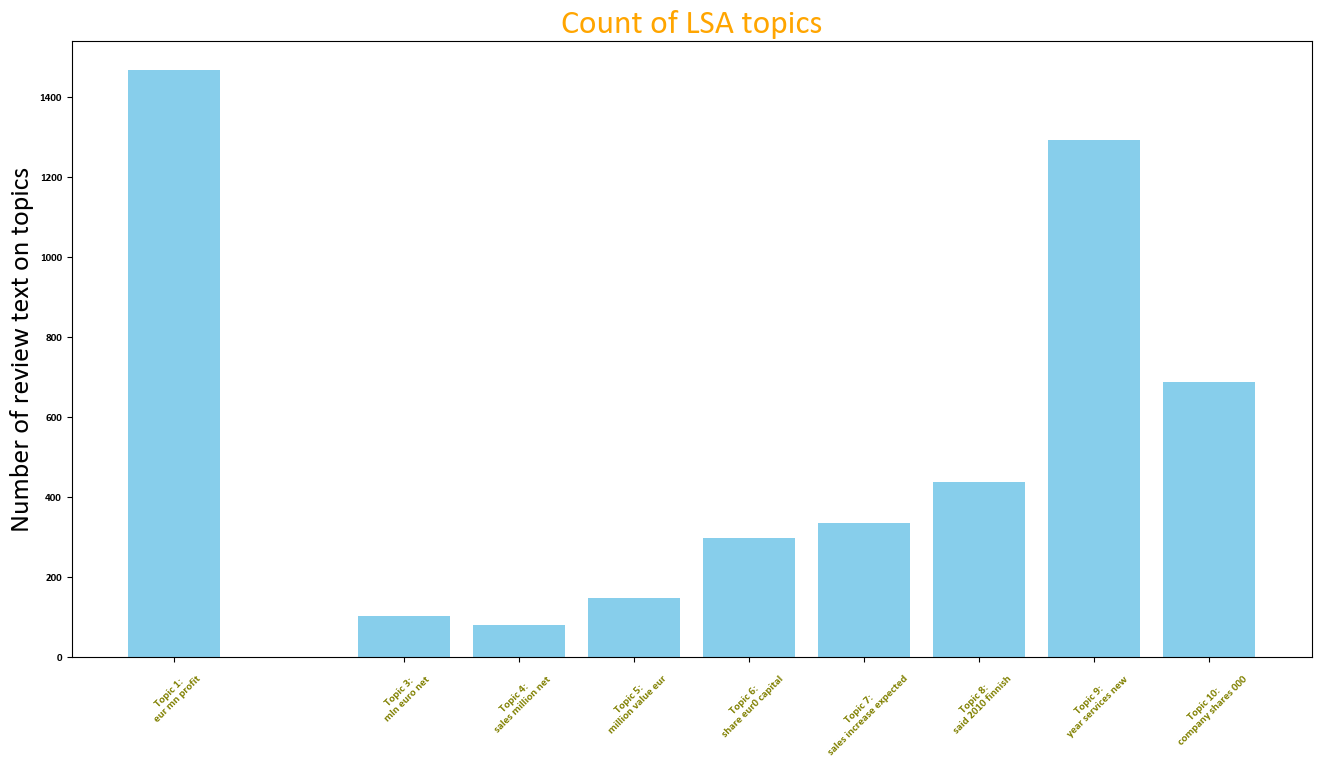

In [113]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i+1) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts,color="skyblue");
ax.set_xticks(lsa_categories,);
ax.set_xticklabels(labels, rotation=45, rotation_mode='default',color="olive");
ax.set_ylabel('Number of review text on topics');
ax.set_title('Count of LSA topics');
plt.show();